In [1]:
#import the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import dataset
ds_train=pd.read_excel('doctor_train.xlsx')
ds_test = pd.read_excel('doctor_test.xlsx')

In [4]:
ds_train.head()


,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [5]:
ds_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


lets deal with teh columns one by one the columns 
from the experience and the rating we just need the firts 2 characters, so we will slice thsi strings to include just first 2 characters

the rating has Nan in top 5 values itself so lets see how many total Nan values are there

In [6]:
ds_train['Rating'].isnull().sum()

3302

In [7]:
ds_train.shape

(5961, 7)

In [8]:
ds_train['Rating'].fillna('00',inplace=True)

In [9]:
ds_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,00,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,00,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [10]:
ds_train['Rating']=ds_train['Rating'].str.slice(stop=-1).astype(int)

In [11]:
#same thing for test data set
ds_test['Rating'].fillna('00',inplace=True)
ds_test['Rating']=ds_test['Rating'].str.slice(stop=-1).astype(int)

lets check null for experience and settle that column in train and test

In [12]:
print(ds_train['Experience'].isnull().sum())
print(ds_test['Experience'].isnull().sum())

0
0


In [13]:
ds_train['Experience']=ds_train['Experience'].str.slice(stop=2).astype(int)
ds_test['Experience']=ds_test['Experience'].str.slice(stop=2).astype(int)

In [14]:
ds_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [15]:
ds_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35,0,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,0,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40,70,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0,0,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [16]:
ds_train['Profile'].unique()

array(['Homeopath', 'Ayurveda', 'ENT Specialist', 'Dentist',
       'General Medicine', 'Dermatologists'], dtype=object)

In [17]:
ds_test['Profile'].unique()

array(['General Medicine', 'ENT Specialist', 'Dermatologists', 'Ayurveda',
       'Dentist', 'Homeopath'], dtype=object)

In [18]:
mapping_dict={'Profile':{'General Medicine':0,'ENT Specialist':1,'Dermatologists':2,'Ayurveda':3,'Dentist':4,'Homeopath':5}}
ds_train.replace(mapping_dict,inplace=True)

In [19]:
ds_test.replace(mapping_dict,inplace=True)

In [20]:
ds_train.Place = ds_train.Place.apply(lambda x: ','.join(str(x).lower().replace(" ","").split(",")))
ds_test.Place = ds_test.Place.apply(lambda x: ','.join(str(x).lower().replace(" ","").split(",")))

In [21]:
ds_train['City'] = ds_train['Place'].apply(lambda x: str(x).replace(' ','').split(',')[-1])
ds_train['Locality'] = ds_train['Place'].apply(lambda x: str(x).rsplit(',', 1)[0])

ds_test['City'] = ds_test['Place'].apply(lambda x: str(x).replace(' ','').split(',')[-1])
ds_test['Locality'] = ds_test['Place'].apply(lambda x: str(x).rsplit(',', 1)[0])

In [22]:
ds_train.head()


,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Locality
0,"BHMS, MD - Homeopathy",24,100,"kakkanad,ernakulam",5,"100% 16 Feedback Kakkanad, Ernakulam",100,ernakulam,kakkanad
1,"BAMS, MD - Ayurveda Medicine",12,98,"whitefield,bangalore",3,"98% 76 Feedback Whitefield, Bangalore",350,bangalore,whitefield
2,"MBBS, MS - Otorhinolaryngology",9,0,"mathikere-bel,bangalore",1,NaN,300,bangalore,mathikere-bel
3,"BSc - Zoology, BAMS",12,0,"bannerghattaroad,bangalore",3,"Bannerghatta Road, Bangalore ₹250 Available on...",250,bangalore,bannerghattaroad
4,BAMS,20,100,"keelkattalai,chennai",3,"100% 4 Feedback Keelkattalai, Chennai",250,chennai,keelkattalai


In [23]:
ds_train.drop('Place',axis=1,inplace=True)
ds_test.drop('Place',axis=1,inplace=True)

In [24]:
ds_train['City'].unique()

array(['ernakulam', 'bangalore', 'chennai', 'delhi', 'hyderabad',
       'coimbatore', 'mumbai', 'thiruvananthapuram', 'nan', 'e'],
      dtype=object)

In [25]:
ds_test['City'].unique()

array(['mumbai', 'hyderabad', 'chennai', 'delhi', 'bangalore',
       'coimbatore', 'thiruvananthapuram', 'ernakulam', 'nan'],
      dtype=object)

In [26]:
ds_train['City'].value_counts()

bangalore             1258
mumbai                1219
delhi                 1185
hyderabad              951
chennai                855
coimbatore             228
ernakulam              153
thiruvananthapuram      86
nan                     25
e                        1
Name: City, dtype: int64

In [27]:
ds_test['City'].value_counts()

bangalore             420
delhi                 417
mumbai                389
hyderabad             333
chennai               287
coimbatore             70
ernakulam              48
thiruvananthapuram     17
nan                     6
Name: City, dtype: int64

In [28]:
print(ds_train.shape)
print(ds_test.shape)

(5961, 8)
(1987, 7)


In [29]:
ds_train['City'].value_counts()

bangalore             1258
mumbai                1219
delhi                 1185
hyderabad              951
chennai                855
coimbatore             228
ernakulam              153
thiruvananthapuram      86
nan                     25
e                        1
Name: City, dtype: int64

In [30]:
ds_train['City'].value_counts()

bangalore             1258
mumbai                1219
delhi                 1185
hyderabad              951
chennai                855
coimbatore             228
ernakulam              153
thiruvananthapuram      86
nan                     25
e                        1
Name: City, dtype: int64

In [31]:
print(ds_train.shape)
print(ds_test.shape)

(5961, 8)
(1987, 7)


In [32]:
ds_train = ds_train[ds_train['City'] !='nan']

In [33]:
ds_test = ds_test[ds_test['City'] !='nan']

In [34]:
ds_train.shape

(5936, 8)

In [35]:
ds_test.shape

(1981, 7)

In [36]:
ds_train['City'].value_counts()

bangalore             1258
mumbai                1219
delhi                 1185
hyderabad              951
chennai                855
coimbatore             228
ernakulam              153
thiruvananthapuram      86
e                        1
Name: City, dtype: int64

In [37]:
ds_train = ds_train[ds_train['City'] != 'e']

In [38]:
ds_train['City'].value_counts()

bangalore             1258
mumbai                1219
delhi                 1185
hyderabad              951
chennai                855
coimbatore             228
ernakulam              153
thiruvananthapuram      86
Name: City, dtype: int64

In [39]:
mapping_dict={'City':{'bangalore':0,'mumbai':1,'delhi':2,'hyderabad':3,'chennai':4,'coimbatore':5,'ernakulam':6,'thiruvananthapuram':7}}
ds_train.replace(mapping_dict,inplace=True)
ds_test.replace(mapping_dict,inplace=True)

In [40]:
ds_train.drop('Locality',axis=1,inplace=True)
ds_test.drop('Locality',axis=1,inplace=True)

In [41]:
ds_train.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,City
0,"BHMS, MD - Homeopathy",24,100,5,"100% 16 Feedback Kakkanad, Ernakulam",100,6
1,"BAMS, MD - Ayurveda Medicine",12,98,3,"98% 76 Feedback Whitefield, Bangalore",350,0
2,"MBBS, MS - Otorhinolaryngology",9,0,1,NaN,300,0
3,"BSc - Zoology, BAMS",12,0,3,"Bannerghatta Road, Bangalore ₹250 Available on...",250,0
4,BAMS,20,100,3,"100% 4 Feedback Keelkattalai, Chennai",250,4


In [42]:
ds_test.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,City
0,MBBS,35,0,0,NaN,1
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,0,1,NaN,3
2,"MBBS, DDVL",40,70,2,"70% 4 Feedback KK Nagar, Chennai",4
3,BAMS,0,0,3,NaN,2
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100,4,General Dentistry Conservative Dentistry Cosme...,0


In [43]:
dat_train = ds_train.Qualification.apply(lambda x: len(x.split(',')))
dat_test = ds_test.Qualification.apply(lambda x: len(x.split(',')))

In [44]:
len(dat_train)

5935

In [45]:
print('max number of qualification hold by doc in train is ',max(dat_train))
print(ds_train.Qualification[dat_train.idxmax()])
print('minimum number of qualification hold by doc in train is ',min(dat_train))
print(ds_train.Qualification[dat_train.idxmin()])

max number of qualification hold by doc in train is  10
Fellowship in Oral implantlogy, Certified Advance Course In Endodontics, Certified in Orthodontics, Certification in Full Mouth Rehabilitation, Certified BPS Dentist, Certificate in Cosmetic Dentistry, Professional Implantology Training Course (PITC), Fellowship in Advanced Endoscopic Sinus Surgery, Degree in Dental Implant, Fellowship in Lasers & Cosmetology
minimum number of qualification hold by doc in train is  1
BAMS


max number of qualifications held by a doc is 10 ahich are mentioned 
minimum number of qualification held by a doc in train dataset is 1 which is BAMS

In [46]:
print(max(dat_test))
print(ds_test.Qualification[dat_test.idxmax()])
print(min(dat_test))
print(ds_test.Qualification[dat_test.idxmin()])

17
BDS, PG Diploma in Conservative, Endodontics and Aesthetic Dentistry, Fellowship In Clinical Cosmetology, PG Diploma In Clinical Cosmetology (PGDCC), MBA - Hospital Management, Diploma in Cosmetic Dentistry, Fellow of Academy of General Education (FAGE), Advanced Retreatment Course in RCT, Advanced Endotontic Course On Root Canal, Certified Course in Oral Surgery, MIDA, Certification in Prosthodontics & Periodontology, Certified Advanced Course in Wisdom Tooth Extraction, Certificate in Cosmetic Dentistry, Fellowship in Aesthetic Dentistry (FAD), Post Graduate Certificate in Endodontics (PGCE)
1
MBBS


max number of qualifications held by a doc is 17 ahich are mentioned 
minimum number of qualification held by a doc in train dataset is 1 which is MBBS

In [47]:
print(max(dat_test))
print(ds_train.Qualification[dat_train.idxmax()])

17
Fellowship in Oral implantlogy, Certified Advance Course In Endodontics, Certified in Orthodontics, Certification in Full Mouth Rehabilitation, Certified BPS Dentist, Certificate in Cosmetic Dentistry, Professional Implantology Training Course (PITC), Fellowship in Advanced Endoscopic Sinus Surgery, Degree in Dental Implant, Fellowship in Lasers & Cosmetology


In [48]:
dat_test.head()

0    1
1    2
2    2
3    1
4    2
Name: Qualification, dtype: int64

In [49]:
ds_train.Qualification=dat_train

In [50]:
ds_train.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,City
0,2,24,100,5,"100% 16 Feedback Kakkanad, Ernakulam",100,6
1,2,12,98,3,"98% 76 Feedback Whitefield, Bangalore",350,0
2,2,9,0,1,NaN,300,0
3,2,12,0,3,"Bannerghatta Road, Bangalore ₹250 Available on...",250,0
4,1,20,100,3,"100% 4 Feedback Keelkattalai, Chennai",250,4


In [51]:
ds_test.Qualification=dat_test

In [52]:
ds_train.drop('Miscellaneous_Info',axis=1,inplace=True)

In [53]:
ds_test.drop('Miscellaneous_Info',axis=1,inplace=True)

In [54]:
ds_train=ds_train[['Qualification','Experience','Rating','Profile','City','Fees']]

In [55]:
ds_train.head()

,Qualification,Experience,Rating,Profile,City,Fees
0,2,24,100,5,6,100
1,2,12,98,3,0,350
2,2,9,0,1,0,300
3,2,12,0,3,0,250
4,1,20,100,3,4,250


In [56]:
ds_test.head()

,Qualification,Experience,Rating,Profile,City
0,1,35,0,0,1
1,2,31,0,1,3
2,2,40,70,2,4
3,1,0,0,3,2
4,2,16,100,4,0


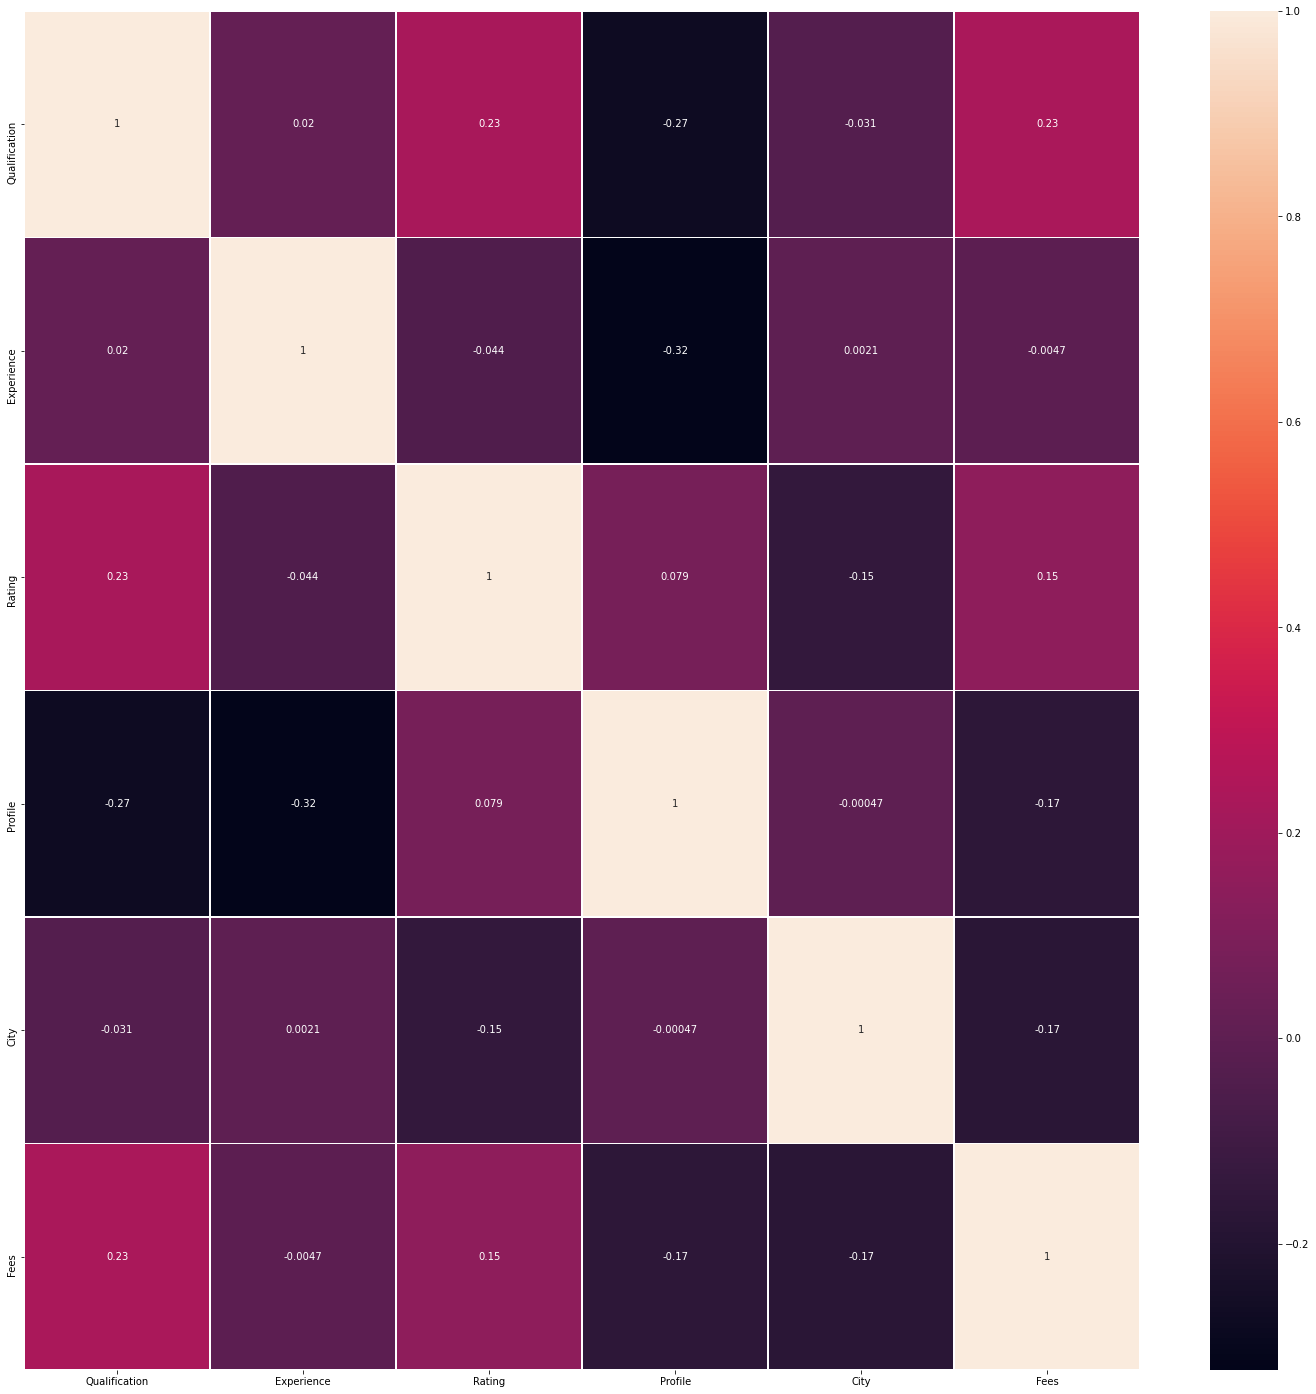

In [57]:
fig, ax=plt.subplots(figsize=(25,25))
sns.heatmap(ds_train.corr(),color='k',annot=True,linewidths=.5, ax=ax)

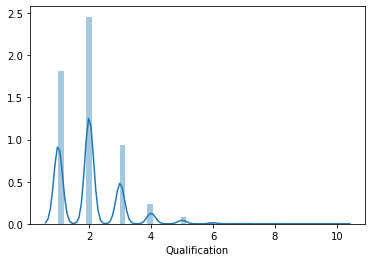

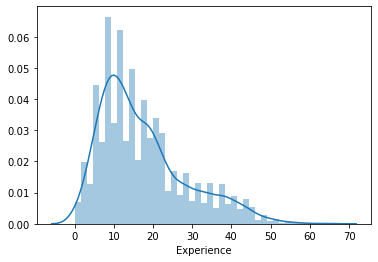

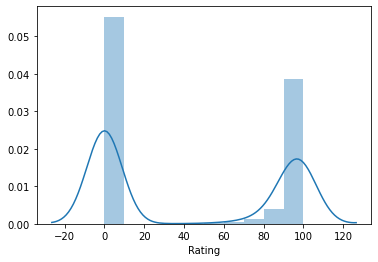

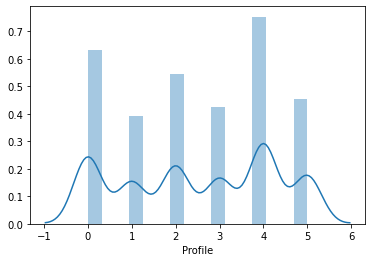

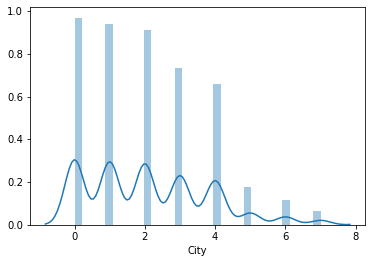

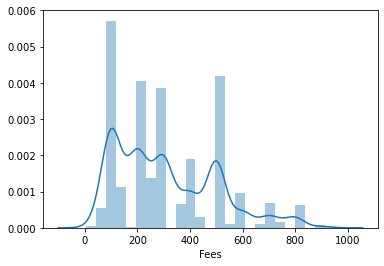

In [58]:
for i in ds_train.columns:
    sns.distplot(ds_train[i])
    plt.show()

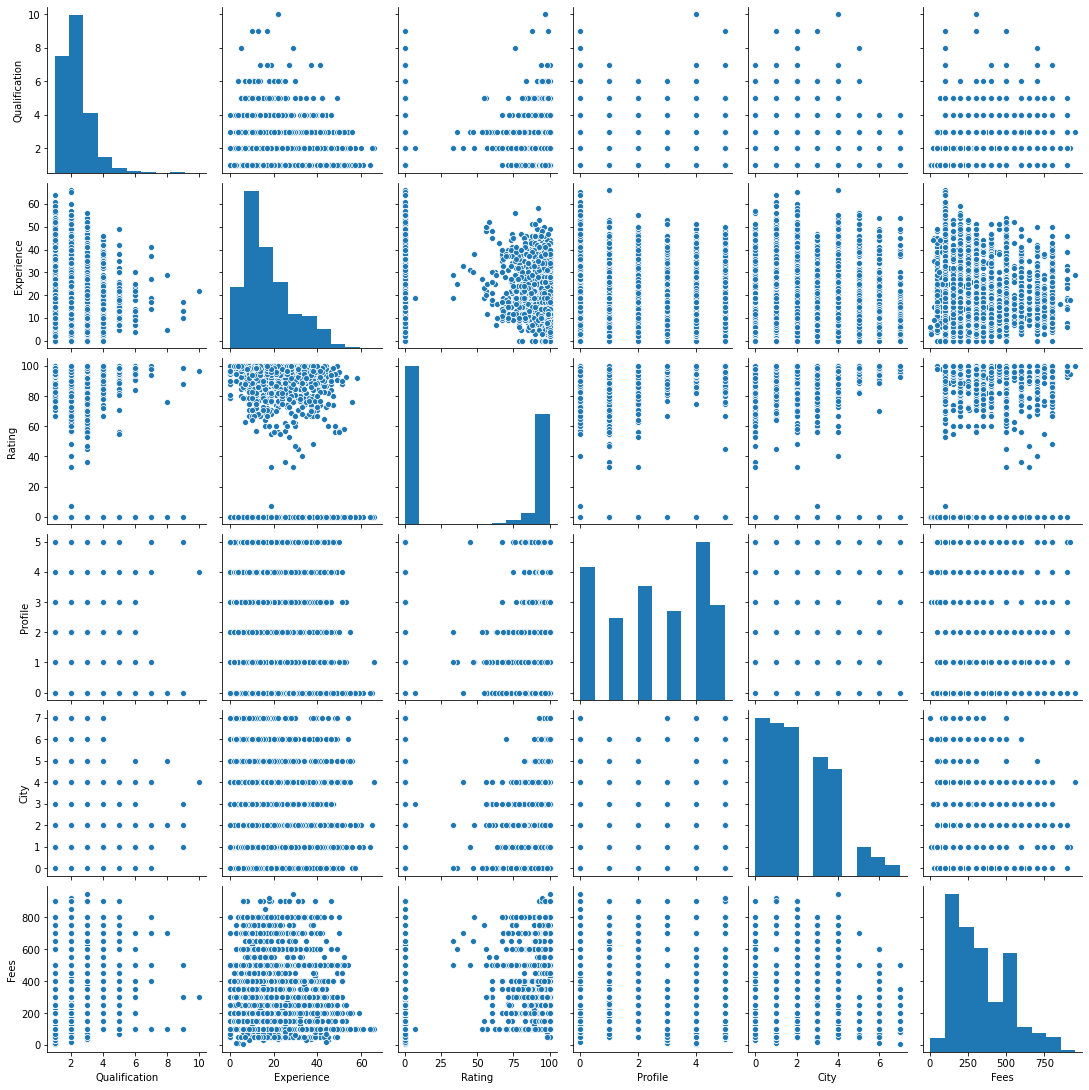

In [59]:
sns.pairplot(ds_train)

In [60]:
x=ds_train.iloc[:,0:-1]
y=ds_train.iloc[:,-1]

In [61]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
ds_tran=sc.fit_transform(x)
ds_fin=pd.DataFrame(ds_tran,columns=x.columns)

In [62]:
ds_fin.head()

,Qualification,Experience,Rating,Profile,City
0,0.002272,0.596494,1.216226,1.436116,2.285109
1,0.002272,-0.483491,1.173994,0.282129,-1.239351
2,0.002272,-0.753487,-0.895358,-0.871858,-1.239351
3,0.002272,-0.483491,-0.895358,0.282129,-1.239351
4,-1.034922,0.236499,1.216226,0.282129,1.110289


In [63]:
x.shape

(5935, 5)

In [64]:
y.shape

(5935,)

In [65]:
ds_fin.shape

(5935, 5)

In [66]:
x1=ds_fin
y1=y

In [67]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,random_state=42,test_size=0.20)

In [68]:
print(x1_train.shape)
print(y1_train.shape)

(4748, 5)
(4748,)


In [69]:
lr=LinearRegression()
lr.fit(x1_train,y1_train)

LinearRegression()

In [70]:
pred_lr=lr.predict(x1_test)

In [71]:
r2_score(y1_test,pred_lr)

0.09497824109470532

In [72]:
y.head()

0    100
1    350
2    300
3    250
4    250
Name: Fees, dtype: int64

In [73]:
r2_scr = 0
random_state=0
for i in range (42,100):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = .20,random_state=i)
    lr.fit(x1_train,y1_train)
    pred_lr = lr.predict(x1_test)
    x=r2_score(y1_test,pred_lr)
    if x>r2_scr:
        r2_scr = x
        random_state=i

In [74]:
print(r2_scr,random_state)

0.13269185869903533 48


In [75]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
r2_scr_rfr = 0
random_state_rfr=0
for i in range (42,100):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = .20,random_state=i)
    rfr.fit(x1_train,y1_train)
    pred_rfr = rfr.predict(x1_test)
    x=r2_score(y1_test,pred_rfr)
    if x>r2_scr_rfr:
        r2_scr_rfr = x
        random_state_rfr=i
print(r2_scr_rfr,random_state_rfr)
print(r2_score(y1_test,pred_rfr))

0.09659969233026489 96
-0.015034164220965707


In [78]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,random_state=42,test_size=0.20)
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor(n_estimators=50,base_estimator=rfr)
ad.fit(x1_train,y1_train)
ad_pred=ad.predict(x1_test)
r2_score(y1_test,ad_pred)

0.06114963758122427

In [81]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x1_train,y1_train)
gb_pred=gb.predict(x1_test)
r2_score(y1_test,gb_pred)

0.1743323928138043

In [82]:
#finalizing as nothing is working
#finalize and save the model
import joblib
joblib.dump(gb,'doc_regressor.pkl')

['doc_regressor.pkl']

In [83]:
pd.DataFrame(gb_pred).to_csv('doc_regressor.csv')